In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.12.0'

### Getting Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Preprocessind Data

In [4]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [6]:
X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = df[['charges']]

X.shape , y.shape

((1338, 11), (1338, 1))

### Splitting Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070, 1), (268, 11), (268, 1))

### Build & Train Model

#### Experiment - 1

Trying with Basic Model

In [8]:
model_1 = tf.keras.Sequential(
    layers= [
            tf.keras.layers.InputLayer(input_shape=(11,)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
            ],
    name="Medical_charges_predictor"
)

model_1.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model_1.summary()

Model: "Medical_charges_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [9]:
history_1 = model_1.fit(X_train,y_train,epochs=100,verbose=0)

#### Evaluate Model

In [10]:
def get_metrics(y_test,y_pred):
    return (round(tf.keras.metrics.mean_absolute_error(y_true = tf.squeeze(y_test), y_pred= tf.squeeze(y_pred)).numpy(),2), 
        round(tf.keras.metrics.mean_squared_error(y_true = tf.squeeze(y_test), y_pred= tf.squeeze(y_pred)).numpy(),2), 
            round(tf.keras.losses.huber(y_true = tf.squeeze(y_test), y_pred= tf.squeeze(y_pred)).numpy())
    )


y_pred_1 = model_1.predict(X_test)
print(y_pred_1.shape)
mae_1, mse_1, huber_1 = get_metrics(y_test,y_pred_1)

9/9 [==============================] - 0s 2ms/step
(268, 1)


#### Experiment -2

Increasing the model complexity

In [11]:
model_2 = tf.keras.Sequential(
    layers= [
            tf.keras.layers.InputLayer(input_shape=(11,)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(200, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
            ],
    name="Medical_charges_predictor"
)

model_2.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model_2.summary()

Model: "Medical_charges_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [12]:
history_2 = model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [13]:
y_pred_2 = model_2.predict(X_test)
print(y_pred_2.shape)
mae_2, mse_2, huber_2= get_metrics(y_test,y_pred_2)

9/9 [==============================] - 0s 2ms/step
(268, 1)


#### Experiment - 3

Increasing number of epochs

In [14]:
model_3 = tf.keras.Sequential(
    layers= [
            tf.keras.layers.InputLayer(input_shape=(11,)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(200, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
            ],
    name="Medical_charges_predictor"
)

model_3.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model_3.summary()

Model: "Medical_charges_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1200      
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_3 = model_3.fit(X_train,y_train,epochs=1000,verbose=0)

In [16]:
y_pred_3 = model_3.predict(X_test)
print(y_pred_3.shape)
mae_3, mse_3, huber_3= get_metrics(y_test,y_pred_3)

9/9 [==============================] - 0s 2ms/step
(268, 1)


#### Experiment - 4

Incrasing Learning Rate

In [17]:
model_4 = tf.keras.Sequential(
    layers= [
            tf.keras.layers.InputLayer(input_shape=(11,)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(200, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
            ],
    name="Medical_charges_predictor"
)

model_4.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model_4.summary()

Model: "Medical_charges_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1200      
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_4 = model_4.fit(X_train,y_train,epochs=1000,verbose=0)

In [19]:
y_pred_4 = model_4.predict(X_test)
print(y_pred_4.shape)
mae_4, mse_4, huber_4= get_metrics(y_test,y_pred_4)

9/9 [==============================] - 0s 2ms/step
(268, 1)


#### Experiment -5

Go back Learning Rate, but increase number of epocs

In [20]:
model_5 = tf.keras.Sequential(
    layers= [
            tf.keras.layers.InputLayer(input_shape=(11,)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(200, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
            ],
    name="Medical_charges_predictor"
)

model_5.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model_5.summary()

Model: "Medical_charges_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 dense_15 (Dense)            (None, 200)               20200     
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [21]:
history_5 = model_5.fit(X_train,y_train,epochs=5000,verbose=0)

In [22]:
model_5.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1264.6040 - mae: 1264.6040


[1264.60400390625, 1264.60400390625]

In [23]:
y_pred_5 = model_5.predict(X_test)
print(y_pred_5.shape)
mae_5, mse_5, huber_5= get_metrics(y_test,y_pred_5)

9/9 [==============================] - 0s 2ms/step
(268, 1)


### Compare All Model Performance

<Axes: >

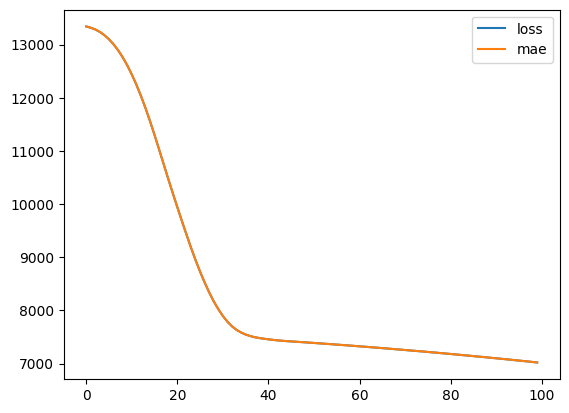

In [24]:
pd.DataFrame(history_1.history).plot()

<Axes: >

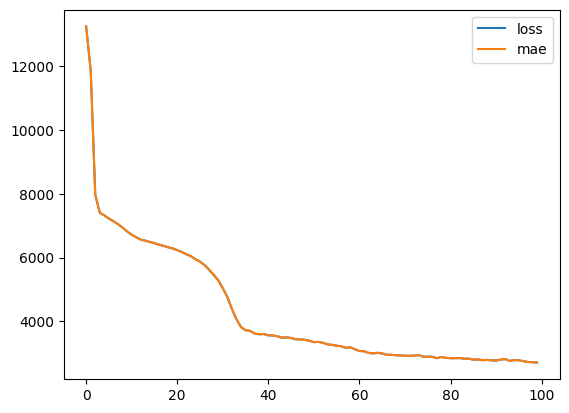

In [25]:
pd.DataFrame(history_2.history).plot()

<Axes: >

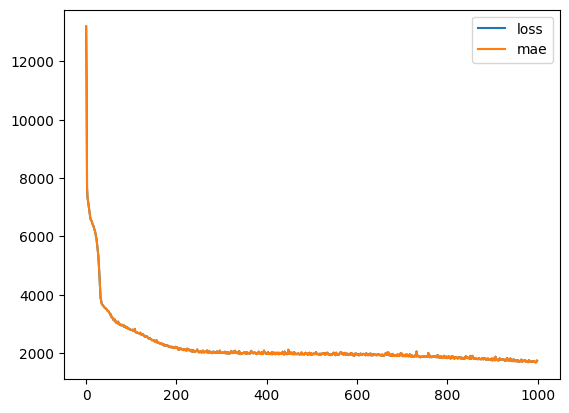

In [26]:
pd.DataFrame(history_3.history).plot()

<Axes: >

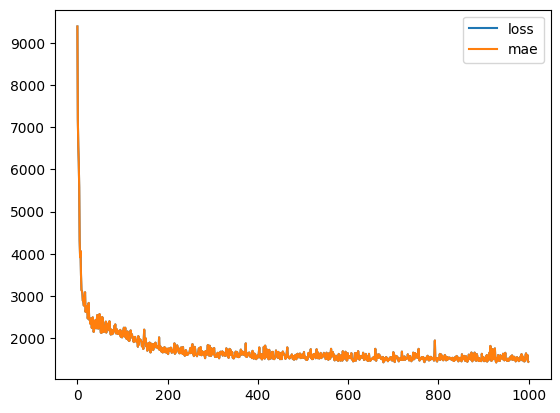

In [27]:
pd.DataFrame(history_4.history).plot()

<Axes: >

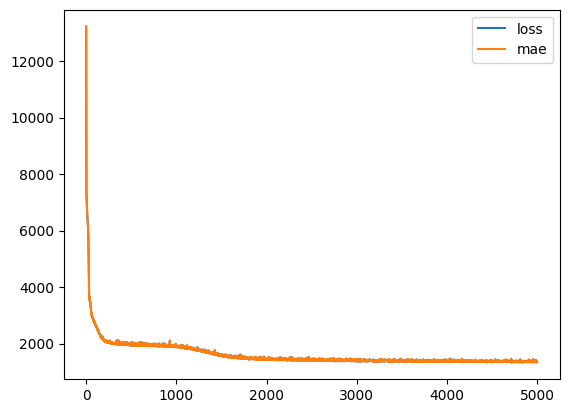

In [28]:
pd.DataFrame(history_5.history).plot()

In [30]:
report = [
    ["model_1" , mae_1, mse_1, huber_1],
    ["model_2" , mae_2, mse_2, huber_2],
    ["model_3" , mae_3, mse_3, huber_3],
    ["model_4" , mae_4, mse_4, huber_4],
    ["model_5" , mae_5, mse_5, huber_5],
    ]

pd.DataFrame(report, columns=["Model" , "MAE", "MSE", "HUBER"])

,Model,MAE,MSE,HUBER
0,model_1,7056.229980,156832672.0,7056
1,model_2,2460.969971,29370648.0,2460
2,model_3,1489.979980,19319532.0,1489
3,model_4,1265.900024,18466694.0,1265
4,model_5,1264.599976,18823056.0,1264


# Preprocessing (Normalization & Standardization)

* Normilzation is turning numbers in the range of 0 to 1

* Standardization is turing the distribution into Normal. Some outliers will be removed


In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

column_transformer = make_column_transformer(
                                            (MinMaxScaler(), ["age" , "bmi" , "children"]),
                                            (OneHotEncoder(), ["sex" , "smoker" , "region"])
                                        )

X = df.drop("charges", axis=1)
y = df[["charges"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)
column_transformer.fit(X_train)
X_train = column_transformer.transform(X_train)
X_test = column_transformer.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070, 1), (268, 11), (268, 1))

### Experiment - 6

Same as Experiment 5 with new Tansformed Data^

In [50]:
model_6 = tf.keras.Sequential(
    layers= [
            tf.keras.layers.InputLayer(input_shape=(11,)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(200, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
            ],
    name="Medical_charges_predictor"
)

model_6.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model_6.summary()

Model: "Medical_charges_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1200      
                                                                 
 dense_19 (Dense)            (None, 200)               20200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [51]:
history_6 = model_6.fit(X_train,y_train,epochs=5000,verbose=0)

<Axes: >

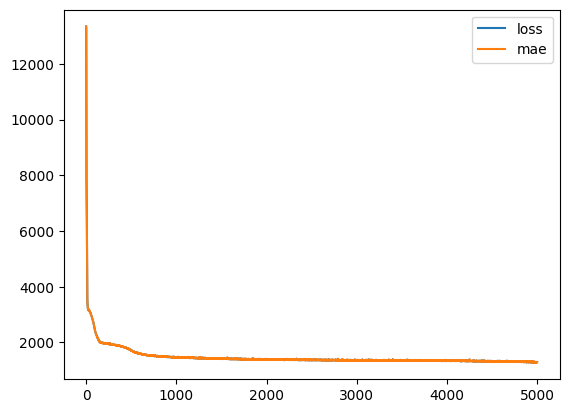

In [55]:
pd.DataFrame(history_6.history).plot()

In [52]:
model_6.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1401.6222 - mae: 1401.6222


[1401.6221923828125, 1401.6221923828125]

In [53]:
y_pred_6 = model_6.predict(X_test)
print(y_pred_6.shape)
mae_6, mse_6, huber_6= get_metrics(y_test,y_pred_6)

9/9 [==============================] - 0s 2ms/step
(268, 1)


### Comparing All Model Performance

In [54]:
report = [
    ["model_1" , mae_1, mse_1, huber_1],
    ["model_2" , mae_2, mse_2, huber_2],
    ["model_3" , mae_3, mse_3, huber_3],
    ["model_4" , mae_4, mse_4, huber_4],
    ["model_5" , mae_5, mse_5, huber_5],
    ["model_6" , mae_6, mse_6, huber_6],
    ]

pd.DataFrame(report, columns=["Model" , "MAE", "MSE", "HUBER"])

,Model,MAE,MSE,HUBER
0,model_1,7056.229980,156832672.0,7056
1,model_2,2460.969971,29370648.0,2460
2,model_3,1489.979980,19319532.0,1489
3,model_4,1265.900024,18466694.0,1265
4,model_5,1264.599976,18823056.0,1264
5,model_6,1401.619995,19952580.0,1401


For me, the Normalization is not given good results. For my data and model, with and without normlization gives same results.